In [63]:
import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import OneHotEncoder

In [30]:
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

In [31]:
rf = RandomForestClassifier(n_estimators=10000).fit(X_train, y_train)

In [32]:
mean_losses = []
for j in tqdm(range(1000)):
    losses = []
    for i in range(1000):
        tree_idx = np.random.randint(rf.n_estimators)
        instance_idx = np.random.randint(X_test.shape[0])

        y_hat = rf.estimators_[tree_idx].predict([X_test[instance_idx]])
        y_true = y_test[instance_idx]
        losses.append(1 if y_hat != y_true else 0)
    mean_losses.append(np.mean(losses))

  0%|          | 0/1000 [00:00<?, ?it/s]

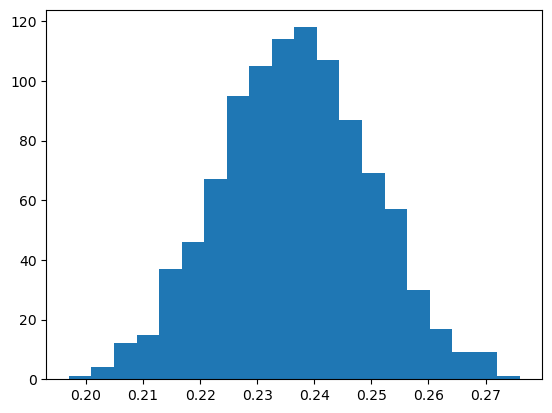

In [33]:
plt.hist(mean_losses, bins=20)
plt.show()

In [82]:
mean_losses = []
y_test_encoded = OneHotEncoder(sparse_output=False).fit_transform(y_test.reshape((len(y_test), 1)))
for j in tqdm(range(10**5)):
    losses = []
    tree_idx = np.random.randint(rf.n_estimators)
    #y_hat_proba = np.array(rf.estimators_[tree_idx].predict_proba(X_test))
    y_hat = np.array(rf.estimators_[tree_idx].predict(X_test))
    
    #mean_losses.append(np.mean(((y_test_encoded - y_hat_proba)**2).sum(axis=1)))
    mean_losses.append(np.mean(y_test != y_hat))

  0%|          | 0/100000 [00:00<?, ?it/s]

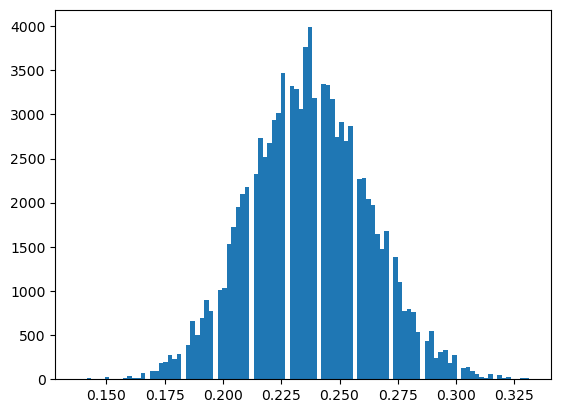

In [83]:
plt.hist(mean_losses, bins=100)
plt.show()